# PROJECT VANGUARD

In [12]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

In [13]:
# Estilo general de las gráficas
sns.set(style="whitegrid")

In [ ]:
# Importamos funciones del .py para utilizarlas en este código 
from functions_project_vanguard import * 

In [15]:
# Leer archivos
df1 = pd.read_csv("df_final_web_data_pt_1.txt")
df2 = pd.read_csv("df_final_web_data_pt_2.txt")
df_demo = pd.read_csv("df_final_demo.txt")
df_experiment = pd.read_csv("df_final_experiment_clients.txt")

In [16]:
# Concatenamos los "WEB"
df_web = pd.concat([df1, df2], ignore_index=True)

### Comenzamos limpieza del df demográfico

In [17]:
# Limpiar y transformar df_demo
df_demo.drop(columns=['clnt_tenure_yr'], inplace=True)
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
df_demo['tenure_months_resto'] = (df_demo['clnt_tenure_mnth'].fillna(0) % 12).astype(int)

In [18]:
# Reordenar columnas
cols = df_demo.columns.tolist()
cols.remove('tenure_years')
cols.remove('tenure_months_resto')
cols.insert(2, 'tenure_years')
cols.insert(3, 'tenure_months_resto')
df_demo = df_demo[cols]

In [19]:
# Rellenar nulos
cols_fill_zero = ['clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth', 'bal','clnt_tenure_mnth']
df_demo[cols_fill_zero] = df_demo[cols_fill_zero].fillna(0)

In [20]:
# Cambiar tipos
int_cols = ['clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth', 'clnt_tenure_mnth']
df_demo[int_cols] = df_demo[int_cols].astype(int)
df_demo['bal'] = df_demo['bal'].round(2)

### Comenzamos el análisis

In [21]:
overview(df_demo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            70609 non-null  int64  
 1   clnt_tenure_mnth     70609 non-null  int64  
 2   tenure_years         70609 non-null  int64  
 3   tenure_months_resto  70609 non-null  int64  
 4   clnt_age             70609 non-null  int64  
 5   gendr                70595 non-null  object 
 6   num_accts            70609 non-null  int64  
 7   bal                  70609 non-null  float64
 8   calls_6_mnth         70609 non-null  int64  
 9   logons_6_mnth        70609 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 5.4+ MB
None


,client_id,clnt_tenure_mnth,tenure_years,tenure_months_resto,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,70595,70609.000000,7.060900e+04,70609.000000,70609.000000
unique,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,24122,NaN,NaN,NaN,NaN
mean,5.004992e+06,150.629495,12.051212,6.014956,46.170616,NaN,2.255081,1.474160e+05,3.381807,5.565636
std,2.877278e+06,82.109121,6.873271,3.815003,15.613245,NaN,0.535886,3.014860e+05,2.236865,2.354357
min,1.690000e+02,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000
25%,2.519329e+06,82.000000,6.000000,2.000000,32.000000,NaN,2.000000,3.733040e+04,1.000000,4.000000
50%,5.016978e+06,136.000000,11.000000,6.000000,47.000000,NaN,2.000000,6.332209e+04,3.000000,5.000000
75%,7.483085e+06,192.000000,16.000000,10.000000,59.000000,NaN,2.000000,1.375217e+05,6.000000,7.000000


### Análisis general

Ver el género de todos nuestros clientes

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/2538854279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_gendr= sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")


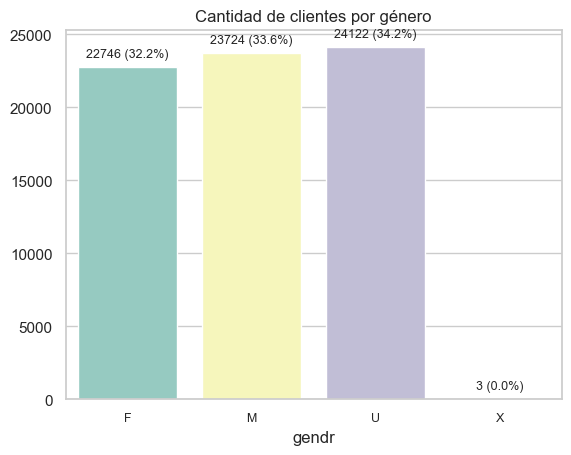

In [22]:
# Distribución de género
gendr = df_demo['gendr'].value_counts().sort_index()
graf_gendr= sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")
plt.title("Cantidad de clientes por género")
plt.xticks(fontsize=9)

# Añadir etiquetas con conteo y porcentaje
total = gendr.sum()
for i, count in enumerate(gendr.values):
    pct = count / total * 100
    graf_gendr.text(i, count + total * 0.01, f"{count} ({pct:.1f}%)", ha='center', fontsize=9)
plt.show()

###### Apreciamos, que hay mas hombres que mujeres pero cabe destacar que un tercio de los clientes son de genero desconocido.

Ver la edad de todos nuestros clientes.

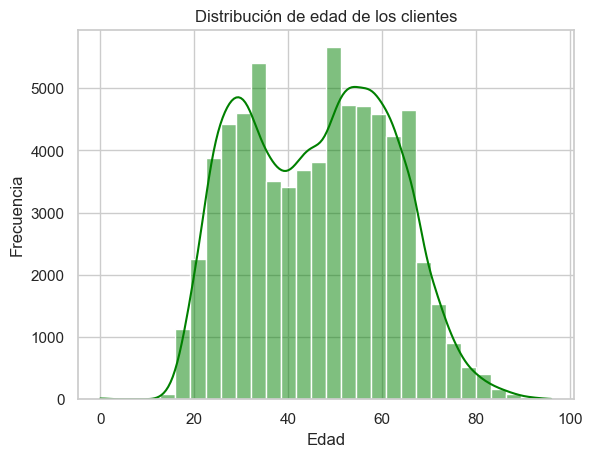

In [23]:
# Histograma de edad
sns.histplot(df_demo['clnt_age'], kde=True, bins=30, color="green")
plt.title("Distribución de edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

###### Apreciamos que gran parte de nuestros clientes tienen edades comprendidas entre los 25-35 (se puede deber a que son clientes con ingresos y pocas obligaciones económicas o familiares), por otro lado, destaca también el rango de edades entre los 50-65 (clientes que han dejado atrás las obligaciones y tienen ingresos para invertir para su jubilación)

La antiguedad de todos nuestros clientes

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/2630322810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")


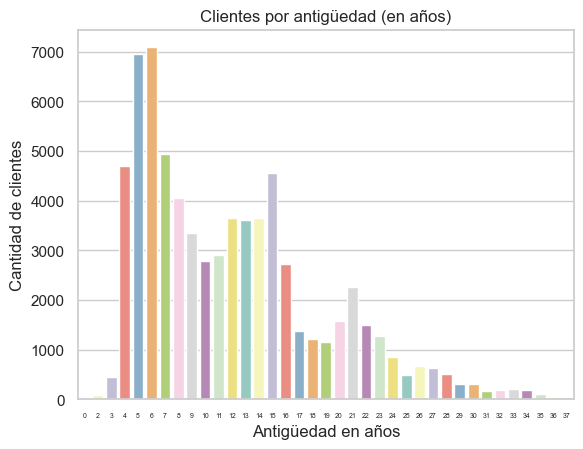

In [24]:
# Antigüedad en años
conteo_años = df_demo['tenure_years'].value_counts().sort_index()
conteo_años = conteo_años[conteo_años.index <= 37]
sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")
plt.title("Clientes por antigüedad (en años)")
plt.xlabel("Antigüedad en años")
plt.ylabel("Cantidad de clientes")
plt.xticks(fontsize=5)
plt.show()

###### La mayoria de nuestros clientes tienen una antiguedad entre 4 y 7 años

### Analisis de comportamiento web

Creación de quintiles por cantidad de bal, así categorizamos los que invierten más y menos con nosotros.

In [25]:
# Rango de inversión (5 bins)
labels_inversion = ['Muy baja inversión', 'Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']
df_demo['rango_inversion'] = pd.cut(df_demo['bal'], bins=5, labels=labels_inversion)

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/3760488930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")


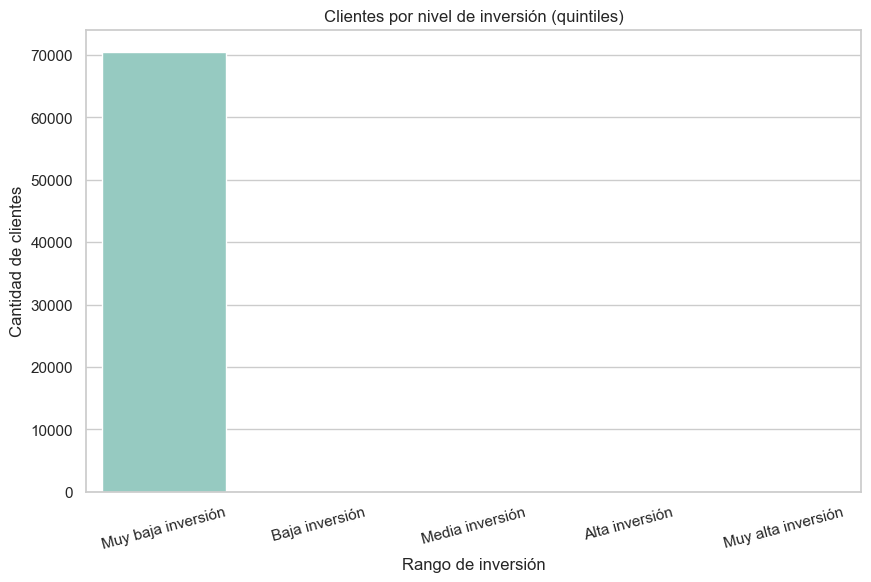

In [26]:
conteo_rangos = df_demo['rango_inversion'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")
plt.title("Clientes por nivel de inversión (quintiles)")
plt.xlabel("Rango de inversión")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=15)
plt.show()

###### Apreciamos que al dividir por quintiles de 'Bal' la mayoria de nuestros clientes estarian en perfil 'muy baja inversion', al no ser representativo para el analisis, lo estudiamos el 'Bal' por rangos de cantidad de clientes.

Creación de quintiles por clientes ordenados por cantidad de bal, así categorizamos los que invierten más y menos con nosotros.

In [27]:
# Definimos los 5 quintiles basados en los valores reales de 'bal'
quintiles = pd.qcut(df_demo['bal'], q=5, precision=2, duplicates='drop')

In [28]:
# Creamos etiquetas personalizadas con los límites reales
rango_quintiles = quintiles.cat.categories
# Crear etiquetas con formato "mín–máx"
labels_quintiles = [f"{int(i.left):,}–{int(i.right):,}" for i in rango_quintiles]
# Asignar etiquetas a nueva columna
df_demo['rango_inversion_quintil'] = pd.qcut(df_demo['bal'], q=5, labels=labels_quintiles)


In [29]:
df_demo.to_csv("df_demo.csv", index=False)

In [30]:
# Contar clientes por rango
conteo_rangos = df_demo['rango_inversion_quintil'].value_counts().sort_index()


/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/2845352893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")


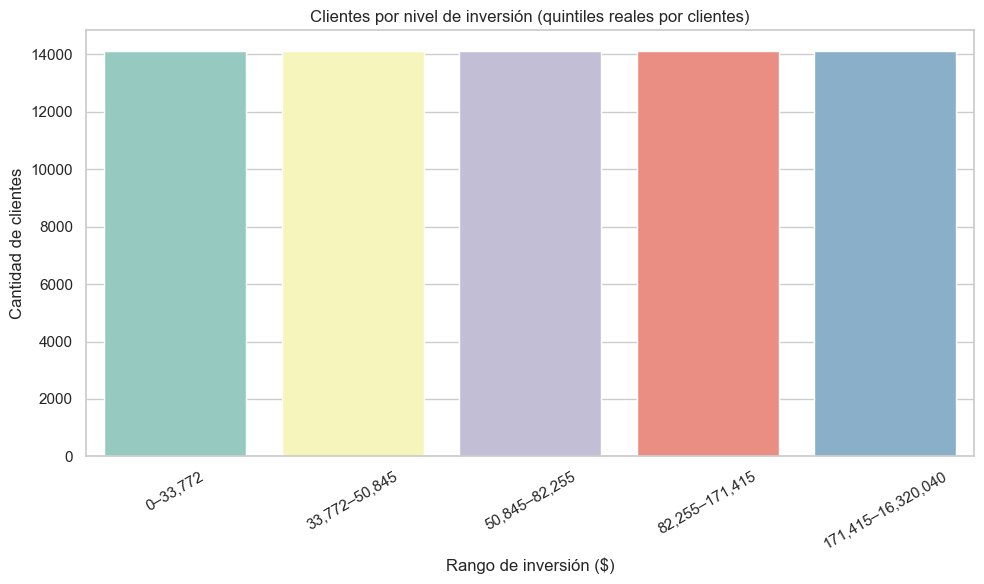

In [31]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")
plt.title("Clientes por nivel de inversión (quintiles reales por clientes)")
plt.xlabel("Rango de inversión ($)")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Las veces que entran en la web los clientes comprendidos en el último quintil de inversion mas alta.

In [32]:
# Filtramos el último quintil (mayor inversión)
ultimo_quintil = df_demo['rango_inversion_quintil'].dropna().unique()[-1:]
df_top_1_quintil = df_demo[df_demo['rango_inversion_quintil'].isin(ultimo_quintil)]

# Total de logins
total_logons = df_top_1_quintil['logons_6_mnth'].sum()
print(f"Total de logins (último quintil): {total_logons:,}")

Total de logins (último quintil): 91,682


/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/1351783035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")


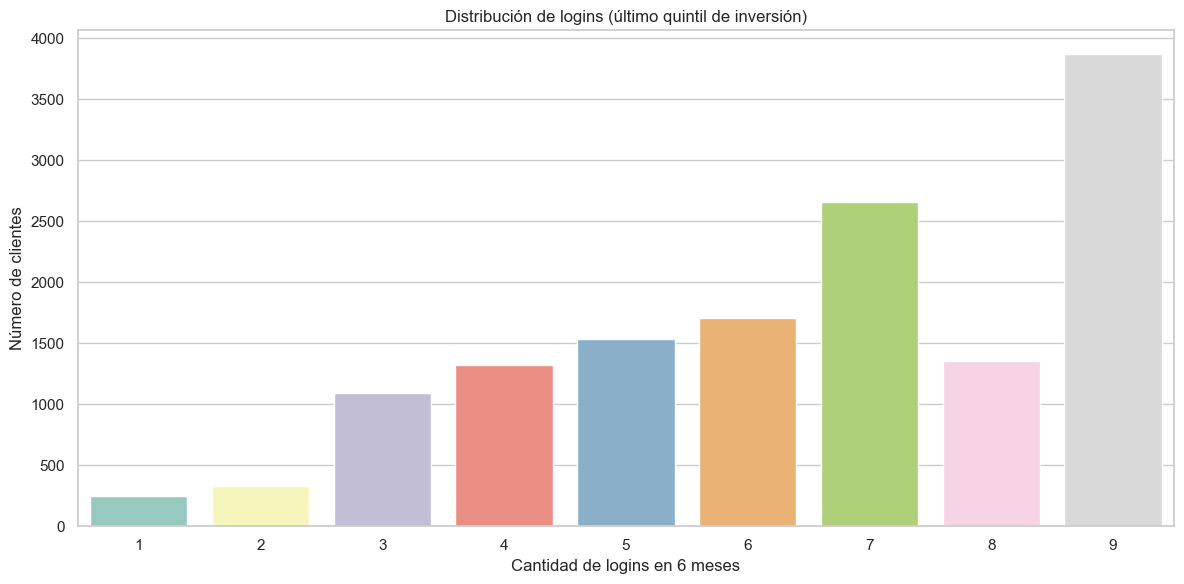

In [33]:
# Distribución de frecuencia de logins
logins_por_frecuencia = df_top_1_quintil['logons_6_mnth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")
plt.title("Distribución de logins (último quintil de inversión)")
plt.xlabel("Cantidad de logins en 6 meses")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###### Dentro del grupo de clientes que más invierte, observamos que la mayoría loguea 9 veces en los últimos 6 meses.

In [34]:
df_demo['logons_6_mnth']

0        9
1        9
2        9
3        6
4        3
        ..
70604    5
70605    6
70606    3
70607    4
70608    7
Name: logons_6_mnth, Length: 70609, dtype: int64

In [35]:
df_demo['rango_inversion'].value_counts()

rango_inversion
Muy baja inversión    70518
Baja inversión           79
Media inversión          10
Alta inversión            1
Muy alta inversión        1
Name: count, dtype: int64

Calculamos la cantidad de clientes por edad que tenemos en nuestro top (mas inversion y acceden a la WEB 9 veces)

Clientes top web (logins = 9 y balance > 171,418): 3870


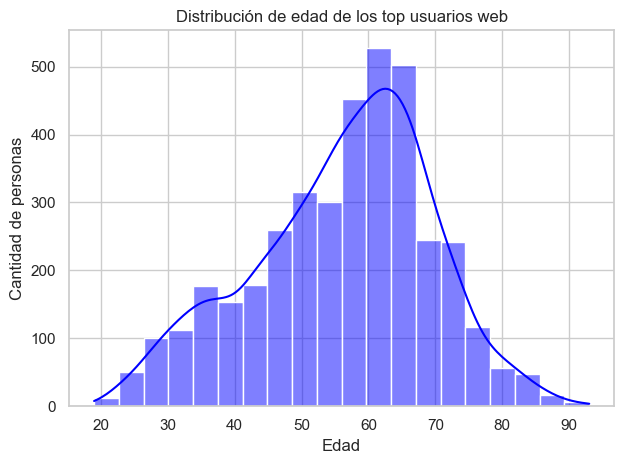

In [36]:
# Calculamos el minimo de 'Bal' perteneciente al ultimo quintil
limite_ultimo_quintil = df_top_1_quintil['bal'].min()

# Filtrar usuarios que se meten 9 veces y mas invierten (el top)
df_top_web = df_demo[(df_demo['logons_6_mnth'] == 9) & (df_demo['bal'] > limite_ultimo_quintil)]

print(f"Clientes top web (logins = 9 y balance > {int(limite_ultimo_quintil):,}): {len(df_top_web)}")

# Edad de los top usuarios
sns.histplot(df_top_web['clnt_age'], kde=True, bins=20, color="blue")
plt.title("Distribución de edad de los top usuarios web")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.tight_layout()
plt.show()

###### La mayoría de nuestros clientes TOP se encuentran en edades comprendidas entre 57-67

Preparar los csv para el experimento A/B

In [37]:
# Limpiamos nulos de experimento
df_experiment = df_experiment.dropna()

In [38]:
# Merge web data + grupo experimental
df_web = df_web.merge(df_experiment, on='client_id', how='inner')

In [39]:
# Merge final con demografía
df_total = df_web.merge(df_demo, on='client_id', how='inner')

In [40]:
#guardar el DataFrame combinado
df_total.to_csv('clientes_vanguard.csv', index=False)

In [41]:
overview(df_total)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321309 entries, 0 to 321308
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   client_id                321309 non-null  int64   
 1   visitor_id               321309 non-null  object  
 2   visit_id                 321309 non-null  object  
 3   process_step             321309 non-null  object  
 4   date_time                321309 non-null  object  
 5   Variation                321309 non-null  object  
 6   clnt_tenure_mnth         321309 non-null  int64   
 7   tenure_years             321309 non-null  int64   
 8   tenure_months_resto      321309 non-null  int64   
 9   clnt_age                 321309 non-null  int64   
 10  gendr                    321207 non-null  object  
 11  num_accts                321309 non-null  int64   
 12  bal                      321309 non-null  float64 
 13  calls_6_mnth             321309 non-null  in

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_mnth,tenure_years,tenure_months_resto,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,rango_inversion,rango_inversion_quintil
count,3.213090e+05,321309,321309,321309,321309,321309,321309.000000,321309.000000,321309.000000,321309.000000,321207,321309.000000,3.213090e+05,321309.000000,321309.000000,321309,321309
unique,NaN,56011,69205,5,283345,2,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,4,5
top,NaN,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:53:01,Test,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Muy baja inversión,"171,415–16,320,040"
freq,NaN,90,88,104082,24,177847,NaN,NaN,NaN,NaN,108884,NaN,NaN,NaN,NaN,320784,71098
mean,5.009769e+06,NaN,NaN,NaN,NaN,NaN,152.084800,12.173048,6.008220,48.247852,NaN,2.262234,1.621582e+05,3.235835,6.273117,NaN,NaN
std,2.872630e+06,NaN,NaN,NaN,NaN,NaN,83.240308,6.965348,3.798737,15.684498,NaN,0.542941,3.494283e+05,2.194064,2.182240,NaN,NaN
min,5.550000e+02,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,NaN,NaN
25%,2.514553e+06,NaN,NaN,NaN,NaN,NaN,82.000000,6.000000,2.000000,34.000000,NaN,2.000000,4.102678e+04,1.000000,4.000000,NaN,NaN
50%,5.052088e+06,NaN,NaN,NaN,NaN,NaN,137.000000,11.000000,6.000000,50.000000,NaN,2.000000,6.919440e+04,3.000000,6.000000,NaN,NaN
75%,7.468402e+06,NaN,NaN,NaN,NaN,NaN,193.000000,16.000000,10.000000,61.000000,NaN,2.000000,1.514369e+05,6.000000,9.000000,NaN,NaN


# KPIs

### KPI 1 Tasa de finalización

In [42]:
# Usuarios que llegan a "confirm"
usuarios_confirmacion = df_web[df_web['process_step'] == 'confirm']

In [43]:
# Total por grupo
total_por_grupo = df_web.groupby('Variation')['client_id'].nunique()
completaron_por_grupo = usuarios_confirmacion.groupby('Variation')['client_id'].nunique()


In [44]:
# Tasa como porcentaje
porcentaje_finalizacion = (completaron_por_grupo / total_por_grupo * 100).reset_index()
porcentaje_finalizacion.columns = ['Variation', 'porcentaje']

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/2509501218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=porcentaje_finalizacion, x='Variation', y='porcentaje', palette='Set2')


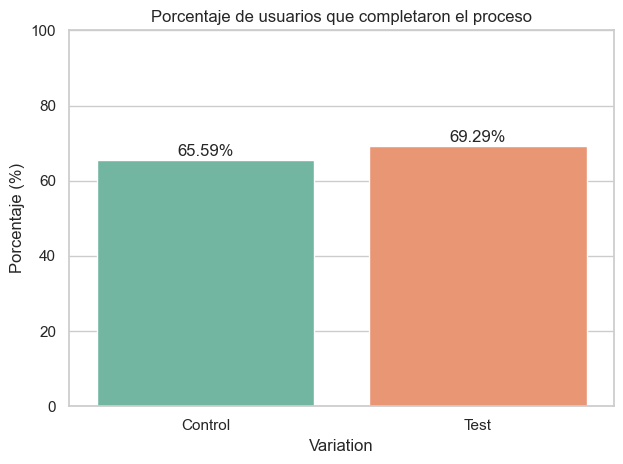

In [45]:
# Gráfico
sns.barplot(data=porcentaje_finalizacion, x='Variation', y='porcentaje', palette='Set2')
plt.title('Porcentaje de usuarios que completaron el proceso')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
# Añadir etiquetas
for i, row in porcentaje_finalizacion.iterrows():
    plt.text(i, row['porcentaje'] + 1, f"{row['porcentaje']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

###### En nuestro análisis A/B, observamos que hay más posibilidad de finalizar el proceso en la prueba Test que los que siguen con Control.

### KPI 2 tasa de abandono

In [46]:
usuarios_totales = df_web.groupby('Variation')['client_id'].nunique()
usuarios_confirmaron = df_web[df_web['process_step'] == 'confirm'].groupby('Variation')['client_id'].nunique()
usuarios_abandonaron = usuarios_totales - usuarios_confirmaron
tasa_abandono = (usuarios_abandonaron / usuarios_totales * 100).round(2)

print("Tasa de abandono por grupo (%):")
print(tasa_abandono)

Tasa de abandono por grupo (%):
Variation
Control    34.41
Test       30.71
Name: client_id, dtype: float64


In [47]:
# Preparamos DataFrame para graficar
df_abandono = tasa_abandono.reset_index()
df_abandono.columns = ['Variation', 'porcentaje']

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/3319482585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_abandono, x='Variation', y='porcentaje', palette='Set2')


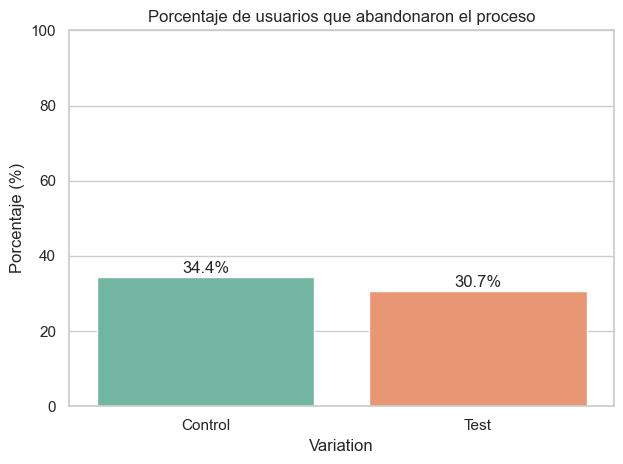

In [48]:
# Gráfico
sns.barplot(data=df_abandono, x='Variation', y='porcentaje', palette='Set2')
plt.title('Porcentaje de usuarios que abandonaron el proceso')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Etiquetas sobre las barras
for i, row in df_abandono.iterrows():
    plt.text(i, row['porcentaje'] + 1, f"{row['porcentaje']:.1f}%", ha='center')

plt.tight_layout()
plt.show()

###### Apreciamos que la probabilidad de abandonar un proceso es mayor en los que siguen en Control que los que tienen la prueba Test.

### KPI 3 tasa de error

In [49]:
# Mapeo de orden
orden_pasos = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_web['orden_actual'] = df_web['process_step'].map(orden_pasos)

# Paso anterior por visita
df_web['orden_anterior'] = df_web.groupby(['client_id', 'visit_id'])['orden_actual'].shift(1)

# ¿hubo paso hacia atrás?
df_web['error'] = df_web['orden_actual'] < df_web['orden_anterior']

errores_por_grupo = df_web[df_web['error']].groupby('Variation')['client_id'].count()
total_pasos_por_grupo = df_web.groupby('Variation')['client_id'].count()
tasa_error = (errores_por_grupo / total_pasos_por_grupo * 100).fillna(0).round(2)

print("Tasa de errores por grupo (%):")
print(tasa_error)

Tasa de errores por grupo (%):
Variation
Control    58.94
Test       58.35
Name: client_id, dtype: float64


In [50]:
# Preparamos DataFrame para graficar
df_errores = tasa_error.reset_index()
df_errores.columns = ['Variation', 'porcentaje']

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/2005917079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_errores, x='Variation', y='porcentaje', palette='Set2')


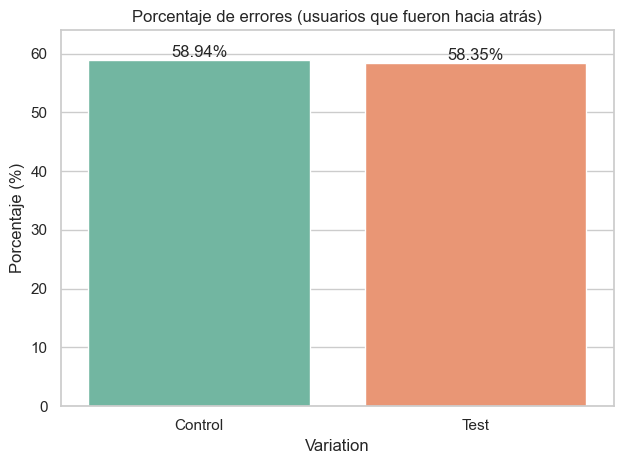

In [51]:
# Gráfico
sns.barplot(data=df_errores, x='Variation', y='porcentaje', palette='Set2')
plt.title('Porcentaje de errores (usuarios que fueron hacia atrás)')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, df_errores['porcentaje'].max() + 5)

# Etiquetas sobre las barras
for i, row in df_errores.iterrows():
    plt.text(i, row['porcentaje'] + 0.5, f"{row['porcentaje']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

###### Vemos la probabilidad de retroceder un paso en el proceso es parecida, levemente mayor en Control que en Test

### KPI 4 tiempo total del proceso completado 

In [52]:
# Convertimos date_time a datetime
df_web['date_time'] = pd.to_datetime(df_web['date_time'].astype(str).str.strip(), errors='coerce')

# Ordenamos
df_web.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Agrupamos por client_id y visita
tiempos_totales = df_web.groupby(['client_id', 'visit_id']).agg({'date_time': ['min', 'max'],'Variation': 'first'}).reset_index()

# Renombrar columnas
tiempos_totales.columns = ['client_id', 'visit_id', 'start_time', 'end_time', 'Variation']

In [53]:
# Duración total en segundos
tiempos_totales['duracion_total_seg'] = (tiempos_totales['end_time'] - tiempos_totales['start_time']).dt.total_seconds()

# Media por grupo
media_duracion = tiempos_totales.groupby('Variation')['duracion_total_seg'].mean().round(2)

print("Tiempo promedio total del proceso por grupo (en segundos):")
print(media_duracion)

Tiempo promedio total del proceso por grupo (en segundos):
Variation
Control    280.51
Test       315.46
Name: duracion_total_seg, dtype: float64


/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/171272278.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_duracion, x='Variation', y='duracion_seg', palette="Set2")


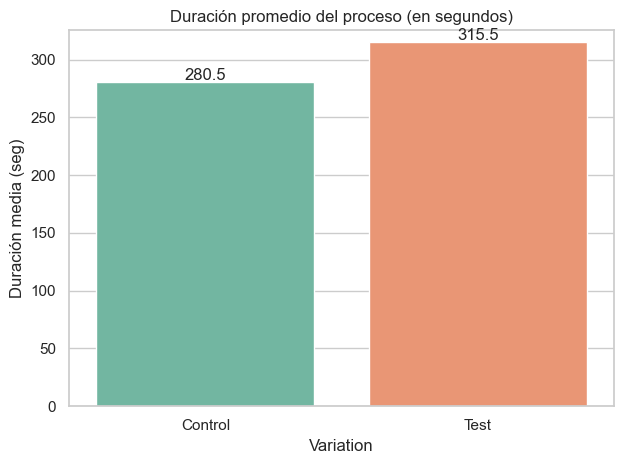

In [54]:
df_duracion = media_duracion.reset_index()
df_duracion.columns = ['Variation', 'duracion_seg']

sns.barplot(data=df_duracion, x='Variation', y='duracion_seg', palette="Set2")
plt.title("Duración promedio del proceso (en segundos)")
plt.ylabel("Duración media (seg)")
plt.ylim(0, df_duracion['duracion_seg'].max() + 10)

for i, row in df_duracion.iterrows():
    plt.text(i, row['duracion_seg'] + 2, f"{row['duracion_seg']:.1f}", ha='center')

plt.tight_layout()
plt.show()

###### Observamos que la media en segundos de completar todo el proceso es mayor en Test que en Control (una media de 35 segundos más)

### KPI 5 Tiempo dedicado a cada paso

In [55]:
# Aseguramos tipo datetime
df_web['date_time'] = pd.to_datetime(df_web['date_time'])

# Calculamos diferencia de tiempo entre eventos por visita
df_web['tiempo_diferencia'] = df_web.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

In [56]:
# Creamos tabla pivote con los timestamps por paso
tabla_tiempos = df_web.pivot_table(index=['client_id', 'visit_id', 'Variation'], columns='process_step',
                                   values='date_time',aggfunc='min')

# Calculamos diferencias entre pasos
tiempos_por_paso = pd.DataFrame()
tiempos_por_paso['start → step_1'] = (tabla_tiempos['step_1'] - tabla_tiempos['start']).dt.total_seconds()
tiempos_por_paso['step_1 → step_2'] = (tabla_tiempos['step_2'] - tabla_tiempos['step_1']).dt.total_seconds()
tiempos_por_paso['step_2 → step_3'] = (tabla_tiempos['step_3'] - tabla_tiempos['step_2']).dt.total_seconds()
tiempos_por_paso['step_3 → confirm'] = (tabla_tiempos['confirm'] - tabla_tiempos['step_3']).dt.total_seconds()
tiempos_por_paso['Variation'] = tabla_tiempos.index.get_level_values('Variation')

In [57]:
# Transiciones a mostrar
transiciones = ['start → step_1', 'step_1 → step_2', 'step_2 → step_3', 'step_3 → confirm']

# Crear un único dataframe largo para graficar
df_melt = tiempos_por_paso.melt(id_vars='Variation', value_vars=transiciones, var_name='Transición', value_name='Tiempo_seg')

# Calcular medias
df_promedios = df_melt.groupby(['Variation', 'Transición'])['Tiempo_seg'].mean().reset_index()

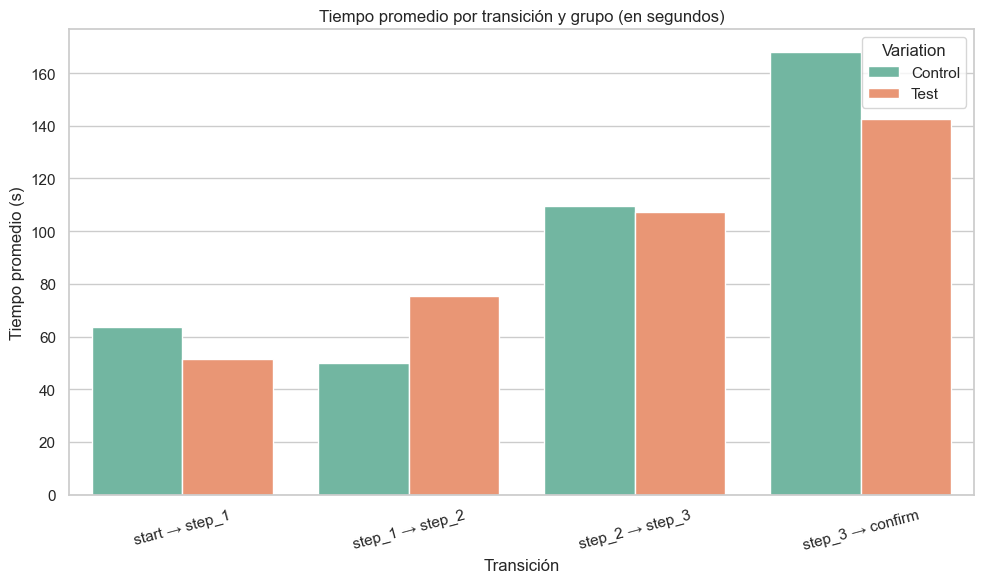

In [58]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_promedios, x='Transición', y='Tiempo_seg', hue='Variation', palette="Set2")
plt.title("Tiempo promedio por transición y grupo (en segundos)")
plt.ylabel("Tiempo promedio (s)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

###### La media en segundos de los pasos Start-1, 2-3 y 3-Confirm, es menor en Test que en Control (Test es más rápido para completar esos pasos)
###### por otro lado, el paso 1-2, es de media en seguntos menor en Control que en Test (Test es más lenta para completar ese paso)

Cantidad nuestro 'TOP' clientes por cada grupo de Test A/B 

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_30218/4215976396.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_top_web, x='Grupo', y='Cantidad', palette="Set2")


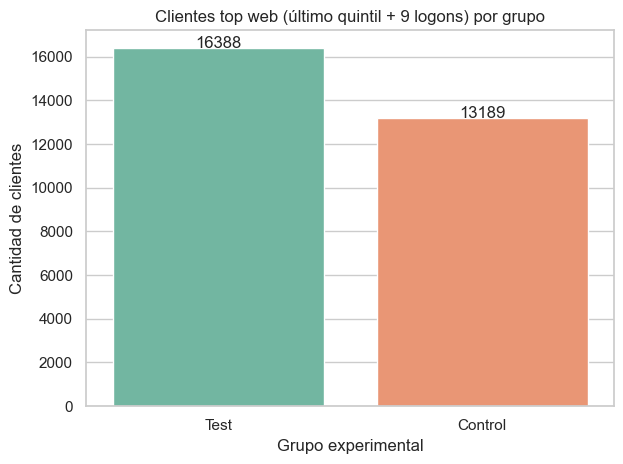

In [59]:
# Obtener límite inferior del último quintil
limite_top_quintil = df_demo[df_demo['rango_inversion_quintil'] == df_demo['rango_inversion_quintil'].dropna().unique()[-1]]['bal'].min()

# Filtrar clientes top web
df_top_web = df_total[(df_total['logons_6_mnth'] == 9) & (df_total['bal'] > limite_top_quintil)]

# Conteo por grupo
conteo_top_web = df_top_web['Variation'].value_counts().reset_index()
conteo_top_web.columns = ['Grupo', 'Cantidad']

# Gráfico
sns.barplot(data=conteo_top_web, x='Grupo', y='Cantidad', palette="Set2")
plt.title("Clientes top web (último quintil + 9 logons) por grupo")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Grupo experimental")
for i, row in conteo_top_web.iterrows():
    plt.text(i, row['Cantidad'] + 1, f"{row['Cantidad']}", ha='center')

plt.tight_layout()
plt.show()

###### Dentro de nuestro clientes TOP, hay más en Test que en Control, aún así es una muestra representativa

# HIPÓTESIS TESTING
### Hipotesis KPI 1 Tasa de finalización

H0 -> la tasa de finalización en Test es = que en Control (son dependientes)

H1 -> la tasa de finalización en Test es diferente que en Control (son independientes)


Si p-valor < 0.05: la diferencia es significativa por tanto el nuevo diseño mejora 

Si p-valor ≥ 0.05: no hay evidencia suficiente de mejora por tanto no justifica el cambio

In [60]:
# Calculamos los que no completaron
no_completaron = total_por_grupo - completaron_por_grupo

tabla = [[completaron_por_grupo['Control'], no_completaron['Control']],
    [completaron_por_grupo['Test'], no_completaron['Test']]]

In [61]:
chi2, p_value, dof, expected = chi2_contingency(tabla)
alpha = 0.05

print(f"Chi² = {chi2}")
print(f"p-value = {p_value}")

if p_value < alpha:
    print("Rechazamos H0: SI hay diferencia significativa entre los grupos.")
else:
    print("No podemos rechazar H0: NO hay diferencia significativa.")

Chi² = 78.5879813123307
p-value = 7.651350968671897e-19
Rechazamos H0: SI hay diferencia significativa entre los grupos.


### Hipótesis KPI 2 tasa de abandono

H0 -> tasa de abandono del Test = que la del Control. 

H1 -> tasa de abandono del Test es diferente que la del Control. 

Si p-valor < 0.05: la diferencia es significativa por tanto el nuevo diseño mejora 

Si p-valor ≥ 0.05: no hay evidencia suficiente de mejora por tanto no justifica el cambio

In [62]:
usuarios_abandonaron = usuarios_totales - usuarios_confirmaron

# Creamos la tabla:
tabla_abandono = [[usuarios_abandonaron['Control'], usuarios_confirmaron['Control']],
    [usuarios_abandonaron['Test'], usuarios_confirmaron['Test']]]

In [63]:
chi2_abandono, p_abandono, _, _ = chi2_contingency(tabla_abandono)
alpha = 0.05

print(f"Chi² abandono = {chi2_abandono}")
print(f"p-value = {p_abandono}")

if p_abandono < alpha:
    print("Rechazamos H₀: SI hay diferencia significativa en la tasa de abandono.")
else:
    print("No se puede rechazar H₀: NO hay evidencia de diferencia significativa.")

Chi² abandono = 78.5879813123307
p-value = 7.651350968671897e-19
Rechazamos H₀: SI hay diferencia significativa en la tasa de abandono.


### Hipótesis KPI 3 tasa de error

H0 -> tasa de error del Test = que la del Control. 

H1 -> tasa de error del Test es diferente que la del Control. 

Si p-valor < 0.05: la diferencia es significativa por tanto el nuevo diseño mejora 

Si p-valor ≥ 0.05: no hay evidencia suficiente de mejora por tanto no justifica el cambio

In [64]:
no_errores = total_pasos_por_grupo - errores_por_grupo

# Creamos tabla
tabla_errores = [[errores_por_grupo['Control'], no_errores['Control']],
    [errores_por_grupo['Test'], no_errores['Test']]]

In [65]:
chi2_error, p_error, _, _ = chi2_contingency(tabla_errores)
alpha = 0.05

print(f"Chi² error = {chi2_error}")
print(f"p-value = {p_error}")

if p_error < alpha:
    print("Rechazamos H₀: SI hay diferencia significativa en la tasa de errores.")
else:
    print("No se puede rechazar H₀: NO hay evidencia de diferencia significativa.")

Chi² error = 11.141397042122023
p-value = 0.0008442228641065478
Rechazamos H₀: SI hay diferencia significativa en la tasa de errores.


### Hipótesis KPI 4 tiempo total del proceso completado

H0 -> el tiempo total del proceso completado es = o mayor en test que en control

H1 -> el tiempo total del proceso completado es menor en test que en control

Si p-valor < 0.05: la diferencia es significativa por tanto el nuevo diseño mejora 

Si p-valor ≥ 0.05: no hay evidencia suficiente de mejora por tanto no justifica el cambio

In [66]:
# Datos ya separados
grupo_control = tiempos_totales[tiempos_totales['Variation'] == 'Control']['duracion_total_seg'].dropna()
grupo_test = tiempos_totales[tiempos_totales['Variation'] == 'Test']['duracion_total_seg'].dropna()


In [67]:
t_stat, p_val = ttest_ind(grupo_test, grupo_control, alternative='less')

print(f"t = {t_stat}")
print(f"p-value unilateral = {p_val}")

if p_val < 0.05:
    print("Rechazamos H₀: el grupo Test es más rápido.")
else:
    print("No se puede rechazar H₀. Por tanto no se reduce el tiempo con Test")

t = 8.171941733637604
p-value unilateral = 0.9999999999999998
No se puede rechazar H₀. Por tanto no se reduce el tiempo con Test


### Hipótesis KPI 5 tiempo por cada paso

H0 -> el tiempo total por paso es = o mayor en test que en control

H1 -> el tiempo total por paso es menor en test que en control

Si p-valor < 0.05: la diferencia es significativa por tanto el nuevo diseño mejora 

Si p-valor ≥ 0.05: no hay evidencia suficiente de mejora por tanto no justifica el cambio

In [68]:
# Lista de transiciones a probar
transiciones = ['start → step_1', 'step_1 → step_2', 'step_2 → step_3', 'step_3 → confirm']

print("Pruebas t (unilateral izquierda): ¿Test es más rápido que Control?\n")

# Iteramos sobre cada paso
for paso in transiciones:
    grupo_control = tiempos_por_paso[tiempos_por_paso['Variation'] == 'Control'][paso].dropna()
    grupo_test = tiempos_por_paso[tiempos_por_paso['Variation'] == 'Test'][paso].dropna()

    t_stat, p_val = ttest_ind(grupo_test, grupo_control, equal_var=False, alternative='less')

    print(f"Paso: {paso}")
    print(f"p-value = {p_val}")
    
    if p_val < 0.05:
        print("Test es significativamente más rápido\n")
    else:
        print("No hay evidencia de que Test sea más rápido\n")

Pruebas t (unilateral izquierda): ¿Test es más rápido que Control?

Paso: start → step_1
p-value = 2.631700201566345e-07
Test es significativamente más rápido

Paso: step_1 → step_2
p-value = 1.0
No hay evidencia de que Test sea más rápido

Paso: step_2 → step_3
p-value = 0.10111008620799927
No hay evidencia de que Test sea más rápido

Paso: step_3 → confirm
p-value = 8.854483723881366e-17
Test es significativamente más rápido



## - La conclusión final, es que Test consigue optimizar el proceso de inversión de nuestros clientes, a pesar del incremento en tiempo del proceso total.
## - De este modo vemos que nuestras hipótesis confirman nuestras apreciaciones previas de las KPIs
## - A nivel empresarial, nos compensa la mayor cantidad de inversiones frente a ralentizar el proceso de inversión